In [6]:
import numpy as np
import pandas as pd

def dotProduct(A,B):
    dp=0
    for i in range(len(B)):
        dp+=(A[i]*B[i])
    return dp

def EuclideanNorm(A):
    n=0
    for i in A:
        n+=i**2
    n=n**(1/2)
    return n

def main():
    data=pd.read_csv("LAB03/train.csv")
    A=data.iloc[:,0]
    B=data.iloc[:,1]
    a=round(dotProduct(A,B),6)
    ae=round(EuclideanNorm(A),6)
    be=round(EuclideanNorm(B),6)
    dpi=round(np.dot(A,B),6)
    Euai=round(np.linalg.norm(A),6)
    Eubi=round(np.linalg.norm(B),6)

    if a==dpi:
        print("Dot Product Same - ", a,dpi)

    if ae==Euai:
        print("Euclidean Norm of A same - ",ae,Euai)

    if be==Eubi:
        print("Euclidean Norm of B same - ",be,Eubi)





In [7]:
import numpy as np
import pandas as pd
import math

def Mean(data):
    res=[]
    for i in range(len(data.columns)-1):
        res.append(sum(data.iloc[:,i])/len(data))
    return res

def var(data):
    m=Mean(data)
    var=0
    for i in data:
        var+=((i-m)**2)
    var=var/len(data)
    return var

def stddev(data):
    v=var(data)
    return math.sqrt(v)

def main():
    data=pd.read_csv("LAB03/train.csv")
    class1=data[data.iloc[:,-1]=="WALKING"]
    class1mean=np.mean(class1.iloc[:,0:-1].to_numpy(dtype=float),axis=0)
    print("Mean of class 1 - ",class1mean)
    class1std=np.std(class1.iloc[:,0:-1].to_numpy(dtype=float),axis=0)
    print("Standard Deviation of class 1 - ",class1std)
    class2=data[data.iloc[:,-1]=="STANDING"]
    class2mean=np.mean(class2.iloc[:,0:-1].to_numpy(dtype=float),axis=0)
    print("Mean of class 2 - ",class2mean)
    class2std=np.std(class2.iloc[:,0:-1].to_numpy(dtype=float),axis=0)
    print("Standard Deviation of class 2 - ",class2std)
    distance=np.linalg.norm(class1mean-class2mean)
    print("Distance between the two classes - ",distance)


In [8]:
#Take any feature from your dataset. Observe the density pattern for that feature by plotting the 
#histogram. Use buckets (data in ranges) for histogram generation and study. Calculate the mean and 
#variance from the available data. 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def main():
    data = pd.read_csv("LAB03/train.csv")
    feature_data = data.iloc[:, 0].to_numpy(dtype=float)  
    plt.hist(feature_data, bins=20, edgecolor='black')
    plt.title('Histogram of Feature 1')
    plt.xlabel('Feature Value')
    plt.ylabel('Frequency')
    plt.show()
    
    mean_value = np.mean(feature_data)
    variance_value = np.var(feature_data)
    
    print(f"Mean: {mean_value}")
    print(f"Variance: {variance_value}")



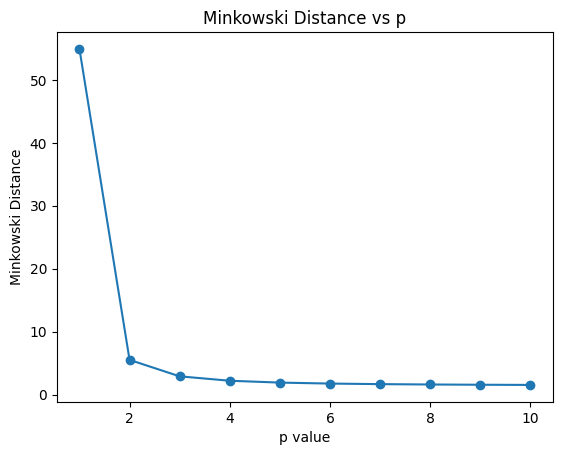

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('train.csv')

numeric_data = data.select_dtypes(include=[np.number])

x = numeric_data.iloc[0].values
y = numeric_data.iloc[1].values

def minkowski_distance(a, b, p):
    return np.sum(np.abs(a - b) ** p) ** (1 / p)

p_values = range(1, 11)
distances = [minkowski_distance(x, y, p) for p in p_values]

plt.figure()
plt.plot(p_values, distances, marker='o')
plt.xlabel("p value")
plt.ylabel("Minkowski Distance")
plt.title("Minkowski Distance vs p")
plt.show()


In [10]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import minkowski

def minkowski_distance(vector1, vector2, p=2):
    vector1 = np.array(vector1)
    vector2 = np.array(vector2)
    
    distance = np.sum(np.abs(vector1 - vector2) ** p) ** (1/p)
    return distance

def main():
    data = pd.read_csv("LAB03/train.csv")
    vector_a = data.iloc[0, :-1].to_numpy(dtype=float)
    vector_b = data.iloc[1, :-1].to_numpy(dtype=float)
    p=[1,2,3,4]
    for p in p:
        dist = minkowski_distance(vector_a, vector_b, p=p)
        inbuiltDist = minkowski(vector_a, vector_b, p=p)
        print(f"p = {p}:")
        print(f"  Own Function:  {dist}")
        print(f"  Inbuilt Function:   {inbuiltDist}")



In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

def main():
    data=pd.read_csv("LAB03/train.csv")
    data=data[data.iloc[:,-1].isin(["WALKING","STANDING"])]
    X=data.iloc[:,:-1].to_numpy(dtype=float)
    y=data.iloc[:,-1].to_numpy()
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
    print("Training data - ",X_train)
    print("Training labels - ",y_train)
    print("Testing data - ",X_test)
    print("Testing labels - ",y_test)


In [12]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

def KNN(X_train, y_train, k=3):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    return neigh

def main():
    data=pd.read_csv("LAB03/train.csv")
    data=data[data.iloc[:,-1].isin(["WALKING","STANDING"])]
    X=data.iloc[:,:-1].to_numpy(dtype=float)
    y=data.iloc[:,-1].to_numpy()
    X_train,X_test,y_train,y_test = split_data(X,y,test_size=0.3)
    neigh = KNN(X_train, y_train, k=3)


In [13]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

def main():
    data = pd.read_csv("LAB03/train.csv")
    data = data[data.iloc[:, -1].isin(["WALKING", "STANDING"])]
    X = data.iloc[:, :-1].to_numpy(dtype=float)
    y = data.iloc[:, -1].to_numpy()
    X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.3)
    neigh = KNN(X_train, y_train, k=3)
    print(neigh.score(X_test, y_test))



In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import split_data
import KNN

def predict(X_train,y_train, X_test,start, end,k=3):
    neigh = KNN(X_train, y_train, k)
    predictions = neigh.predict(X_test[start:end,:])
    return predictions

def main():
    data = pd.read_csv("LAB03/train.csv")
    data = data[data.iloc[:, -1].isin(["WALKING", "STANDING"])]
    X = data.iloc[:, :-1].to_numpy(dtype=float)
    y = data.iloc[:, -1].to_numpy()
    X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.3)
    predictions = predict(X_train, y_train, X_test, 100, 105)
    print("Predictions - ",predictions)
    print("Actual - ",y_test[100:105])



ModuleNotFoundError: No module named 'A6'

In [ ]:
import numpy as np
import pandas as pd
from A9 import predict
from A6 import split_data

def knn(X_train, y_train, X_test, start, end, k=3):
    predictions = []
    for i in range(start, end):
        distances=[]
        key = X_test[i]
        for j in range(len(X_train)):
            dist = np.linalg.norm(X_train[j]-key)
            distances.append((dist,y_train[j]))
        distances.sort(key=lambda x: x[0])
        neighbors = distances[:k]
        classes = {}
        for neighbor in neighbors:
            if neighbor[1] in classes:
                classes[neighbor[1]]+=1
            else:
                classes[neighbor[1]]=1
        predictions.append(max(classes, key=classes.get))
    return predictions

def main():
    data = pd.read_csv("LAB03/train.csv")
    data = data[data.iloc[:, -1].isin(["WALKING", "STANDING"])]
    X = data.iloc[:, :-1].to_numpy(dtype=float)
    y = data.iloc[:, -1].to_numpy()
    X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.3)
    predictions = knn(X_train, y_train, X_test, 100, 105, k=3)
    predictions_inbuilt = predict(X_train, y_train, X_test, 100, 105)
    print("Predictions - ",predictions)
    print("Inbuilt Predictions - ",predictions_inbuilt)
    print("Actual - ",y_test[100:105])
    if np.array_equal(predictions, predictions_inbuilt):
        print("Predictions match with inbuilt function")
    else:
        print("Predictions do not match with inbuilt function")


In [ ]:
import knn
import split_data
import predict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def main():
    data = pd.read_csv("LAB03/train.csv")
    X = data.iloc[:, :-1].to_numpy(dtype=float)
    y = data.iloc[:, -1].to_numpy()
    X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.3)
    predictions_k1 = knn(X_train, y_train, X_test,100,105, k=11)
    predictions_k3 = knn(X_train, y_train, X_test,100,105, k=3)
    pred=predict(X_train, y_train, X_test,100,105,k=1)
    print("Predictions with k=1 - ",predictions_k1)
    print("Predictions with k=3 - ",predictions_k3)
    print("Inbuilt Predictions - ",pred)
    print("Actual - ",y_test[100:105])
    # Accuracy plot for k = 1 to 11
    accuracies = []
    for k in range(1, 12):
        pred = predict(X_train, y_train, X_test, 0, len(X_test), k=k)
        accuracy = np.sum(pred == y_test) / len(y_test)
        accuracies.append(accuracy)
    plt.figure()
    plt.plot(range(1, 12), accuracies, marker='o')
    plt.title('KNN Accuracy for Different k Values')
    plt.xlabel('k Value')
    plt.ylabel('Accuracy')
    plt.show()



ModuleNotFoundError: No module named 'knn'

In [ ]:
import pandas as pd
import numpy as np
from A9 import predict
from A6 import split_data
from sklearn.metrics import confusion_matrix, classification_report, f1_score

def main():
    data = pd.read_csv("LAB03/train.csv")
    X = data.iloc[:, :-1].to_numpy(dtype=float)
    y = data.iloc[:, -1].to_numpy()

    X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.3)

    # for training data
    train_predictions = predict(X_train, y_train, X_train, 0, len(X_train), k=3)

    cm_train = confusion_matrix(y_train, train_predictions)
    print("Confusion Matrix (Training):\n", cm_train)

    print("\nClassification Report (Training):")
    print(classification_report(y_train, train_predictions))

    train_f1 = f1_score(y_train, train_predictions, average='weighted')

    # for testing data
    test_predictions = predict(X_train, y_train, X_test, 0, len(X_test), k=3)

    cm_test = confusion_matrix(y_test, test_predictions)
    print("Confusion Matrix (Testing):\n", cm_test)

    print("\nClassification Report (Testing):")
    print(classification_report(y_test, test_predictions))

    test_f1 = f1_score(y_test, test_predictions, average='weighted')

    # inference
    print("\nModel Learning Outcome:")

    if train_f1 < 0.7 and test_f1 < 0.7:
        print("Model is UNDERFITTING (low performance on both training and testing data).")

    elif train_f1 - test_f1 > 0.15:
        print("Model is OVERFITTING (high training performance but poor test performance).")

    else:
        print("Model is WELL-FITTED (good generalization with similar train and test performance).")


if __name__ == "__main__":
    main()
